<a href="https://colab.research.google.com/github/tchoupoGuy/D-dev-new_NHL/blob/master/MGL_870_TP2_BGL_logs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


## **Partie 1 : Parsing du fichier BGL.log et creation du fichier log_BGL.csv**

In [ ]:
import pandas as pd
from datetime import datetime

# Chemin du fichier log et CSV de sortie
log_file_path = r"/content/drive/MyDrive/MGL870/LOGS_DATASET/BGL.log"
output_file_path = r"/content/drive/MyDrive/MGL870/LOGS_DATASET/logs_BGL.csv"

# Fonction pour parser et structurer les logs
def parse_bgl_log():
    data = []

    # Lecture du fichier de log
    with open(log_file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()  # Supprimer les espaces en début et fin de ligne
        if line:  # Vérifier que la ligne n'est pas vide
            try:
                # Diviser la ligne en segments
                parts = line.split()

                # Vérification des parties pour garantir leur présence
                if len(parts) >= 8:
                    # Unix Timestamp en secondes
                    unix_timestamp = parts[1]
                    timestamp = datetime.fromtimestamp(int(unix_timestamp)).strftime("%Y-%m-%d %H:%M:%S")

                    # Date
                    raw_date = parts[2]
                    date = datetime.strptime(raw_date, "%Y.%m.%d").strftime("%Y-%m-%d")

                    # Identifiant Système
                    system_id = parts[3]

                    # Date et heure détaillée
                    raw_datetime = parts[4]
                    datetime_obj = datetime.strptime(raw_datetime, "%Y-%m-%d-%H.%M.%S.%f")
                    detailed_datetime = datetime_obj.strftime("%Y-%m-%d %H:%M:%S.%f")

                    # Identifiant supplémentaire
                    additional_id = parts[5]

                    # Type de message (message type), Niveau de journalisation (level) et Sévérité (severity)
                    message_type = parts[6]
                    level = parts[7]
                    severity = parts[8]

                    # Message
                    message = " ".join(parts[9:])

                    # Ajouter la ligne parsée à la liste
                    data.append([unix_timestamp, date, system_id, detailed_datetime, additional_id, message_type, level, severity, message])

            except Exception as e:
                print(f"Erreur lors du parsing de la ligne: {line}")
                print(e)

    # Création du DataFrame avec les noms de colonnes
    logs = pd.DataFrame(data, columns=[
        'Timestamp', 'Date', 'System_ID', 'Detailed_Datetime', 'Additional_ID',
        'Message_Type', 'indentifier', 'log_level', 'Message'
    ])

    # Exporter en CSV
    logs.to_csv(output_file_path, index=False, escapechar='\\')
    print(f"Parsing terminé. Fichier CSV enregistré à : {output_file_path}")

# Appeler la fonction pour exécuter le parsing
parse_bgl_log()



Parsing terminé. Fichier CSV enregistré à : /content/drive/MyDrive/MGL870/LOGS_DATASET/logs_BGL.csv


# **Partie 2: Exploration de notre dataset**

How much data do we have?
Do we have any missing data? (NaN)
What are the types of features in our dataset?
How is the distribution of the target variable?

*   De combien de données disposons-nous ?
*  Avons-nous des données manquantes ? (NaN)
*  Quels sont les types de fonctionnalités de notre ensemble de données ?
*  Quelle est la distribution de la variable cible ?





In [ ]:
## Importation des bibliothèques générales que nous utiliserons dans ce notebook
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
logs_bgl = pd.read_csv('/content/drive/MyDrive/MGL870/LOGS_DATASET/logs_BGL.csv')

In [ ]:
logs_bgl.head()

,Timestamp,Date,System_ID,Detailed_Datetime,Additional_ID,Message_Type,indentifier,log_level,Message
0,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
1,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
2,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
3,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
4,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected


In [ ]:
# Afin de faciliter l'accès aux colonnes et d'éviter les erreurs, on remplace les espaces par des underscores (_) dans les noms de colonnes.
logs_bgl.columns = [x.replace(' ', '_') for x in logs_bgl.columns]

In [ ]:
logs_bgl.shape

(4747963, 9)

In [ ]:
# Combien de données avons-nous?
print(f'Nous avons {logs_bgl.shape[0]} lignes et {logs_bgl.shape[1]} colonnes.')

Nous avons 4747963 lignes et 9 colonnes.


In [ ]:
# Avons-nous des données manquantes?
missing_values = logs_bgl.isnull().sum()
print(missing_values)

Timestamp                 0
Date                      0
System_ID             89296
Detailed_Datetime         0
Additional_ID         89296
Message_Type         104215
indentifier               0
log_level                 0
Message               34470
dtype: int64


In [ ]:
# Quels sont les types de caractéristiques (numériques vs catégorielles) ?
print(logs_bgl.dtypes)

Timestamp             int64
Date                 object
System_ID            object
Detailed_Datetime    object
Additional_ID        object
Message_Type         object
indentifier          object
log_level            object
Message              object
dtype: object


In [ ]:
logs_bgl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Timestamp          int64 
 1   Date               object
 2   System_ID          object
 3   Detailed_Datetime  object
 4   Additional_ID      object
 5   Message_Type       object
 6   indentifier        object
 7   log_level          object
 8   Message            object
dtypes: int64(1), object(8)
memory usage: 326.0+ MB


In [ ]:
# Quelle est la distribution de la variable `log_level`?
# Quels sont les types de caractéristiques (numériques vs catégorielles) ?
print(logs_bgl['log_level'].value_counts())


log_level
INFO            3735813
FATAL            855195
ERROR            112355
WARNING           23357
SEVERE            19213
FAILURE            1714
Kill                306
single                4
microseconds          4
0x00544eb8,           2
Name: count, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `Date`?
print(logs_bgl['Date'].value_counts())

Date
2005-07-09    381827
2005-06-14    381561
2005-12-01    271341
2005-11-03    200937
2005-07-23    200654
               ...  
2005-12-21       325
2005-07-31        97
2006-01-04        86
2005-07-30        79
2005-12-23        35
Name: count, Length: 215, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `System_ID`?
print(logs_bgl['System_ID'].value_counts())

System_ID
R30-M0-N9-C:J16-U01    152329
R02-M1-N0-C:J12-U11     64651
R37-M1-NC-C:J02-U11     35288
UNKNOWN_LOCATION        27039
R16-M1-N2-C:J17-U01     16921
                        ...  
R46-M0-L0                   1
R41-M0-L1                   1
R46-M0-L1                   1
R46-M1-L1                   1
R42-M1-L1                   1
Name: count, Length: 69251, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `Detailed_Datetime`?
print(logs_bgl['Detailed_Datetime'].value_counts())

Detailed_Datetime
2005-09-20 12:06:14.325292    2
2005-09-20 12:20:04.726324    2
2005-09-20 12:06:57.761000    2
2005-09-20 12:12:27.581250    2
2005-09-20 12:20:38.133556    2
                             ..
2005-07-09 06:54:21.208006    1
2005-07-09 06:54:21.194460    1
2005-07-09 06:54:21.173179    1
2005-07-09 06:54:21.160078    1
2006-01-04 08:00:05.233639    1
Name: count, Length: 4747955, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `Additional_ID`?
print(logs_bgl['Additional_ID'].value_counts())

Additional_ID
R30-M0-N9-C:J16-U01    152329
R02-M1-N0-C:J12-U11     64651
R37-M1-NC-C:J02-U11     35288
UNKNOWN_LOCATION        27039
R16-M1-N2-C:J17-U01     16921
                        ...  
R46-M0-L1                   1
R46-M1-L1                   1
R40-M1-L1                   1
R46-M1-L0                   1
R42-M1-L1                   1
Name: count, Length: 69257, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `Message_Type`?
print(logs_bgl['Message_Type'].value_counts())

Message_Type
RAS            4643432
KERNEL             306
for                  4
interrupts,          4
(5438708)            1
(4211594)            1
Name: count, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `indentifier`?
print(logs_bgl['indentifier'].value_counts())

indentifier
KERNEL       4324651
APP           228536
DISCOVERY      97172
MMCS           88930
HARDWARE        5148
MONITOR         1681
LINKCARD        1170
FATAL            306
CMCS             211
BGLMASTER        145
a                  4
0                  4
SERV_NET           3
iar                2
Name: count, dtype: int64


In [ ]:
# Quelle est la distribution de la variable Categoriel `Message`?
print(logs_bgl['Message'].value_counts())

Message
data TLB error interrupt                                                                                                                                                       152734
0 microseconds spent in the rbs signal handler during 0 calls. 0 microseconds was the maximum time for a single instance of a correctable ddr.                                 135005
instruction cache parity error corrected                                                                                                                                       105924
idoproxydb hit ASSERT condition: ASSERT expression=0 Source file=idotransportmgr.cpp Source line=1043 Function=int IdoTransportMgr::SendPacket(IdoUdpMgr*, BglCtlPavTrace*)     84168
1146800 double-hummer alignment exceptions                                                                                                                                      74091
                                                                                  

In [ ]:
logs_bgl.describe()

,Timestamp
count,4.747963e+06
mean,1.124001e+09
std,5.227578e+06
min,1.117839e+09
25%,1.120146e+09
50%,1.121600e+09
75%,1.128748e+09
max,1.136390e+09


# **Partie 3: Analyse de la distribution et de la relation des caractéristiques (attributs)**

Dans cette partie de la session pratique, nous allons explorer la relation entre les caractéristiques et leur distribution respective dans le jeu de données.
*   Avons-nous un jeu de données biaisé?
*   Comment certaines caractéristiques sont-elles liées à un bon/mauvais crédit?





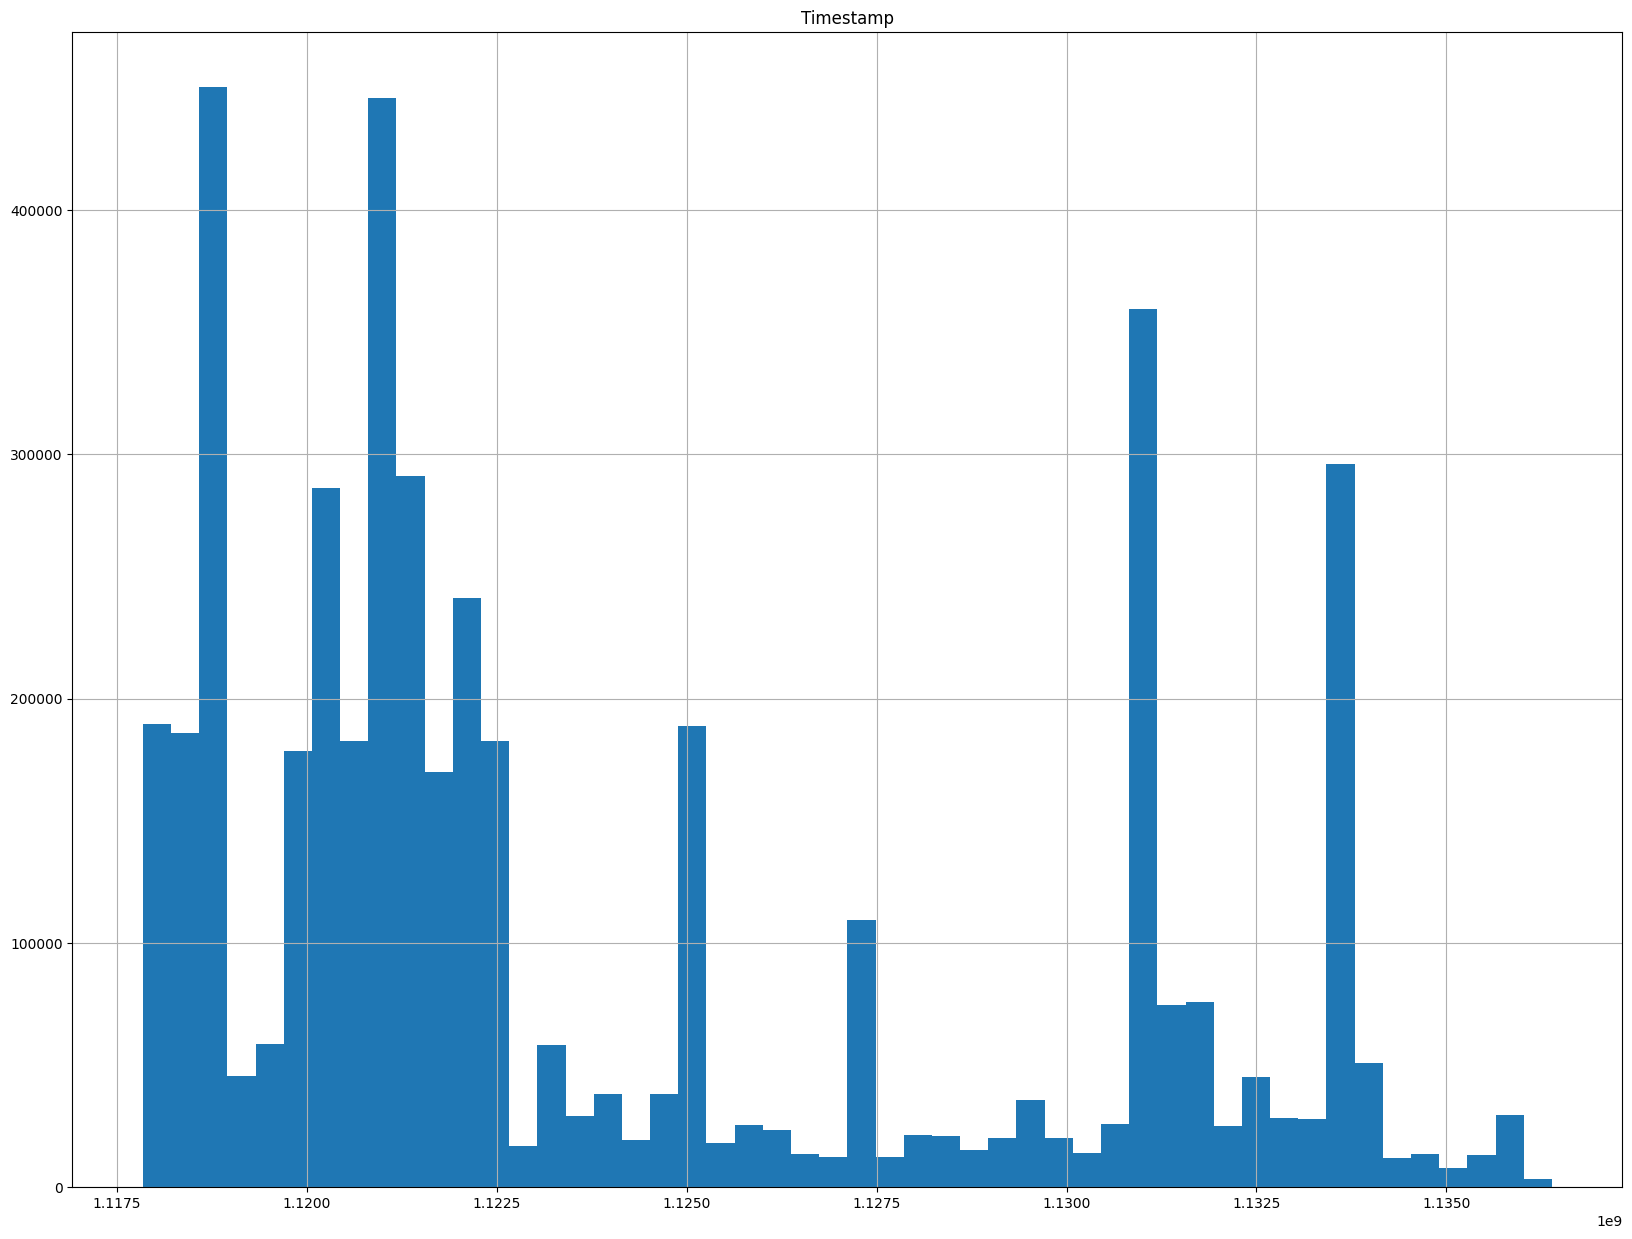

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
logs_bgl.hist(bins=50, figsize=(20,15))
plt.show()

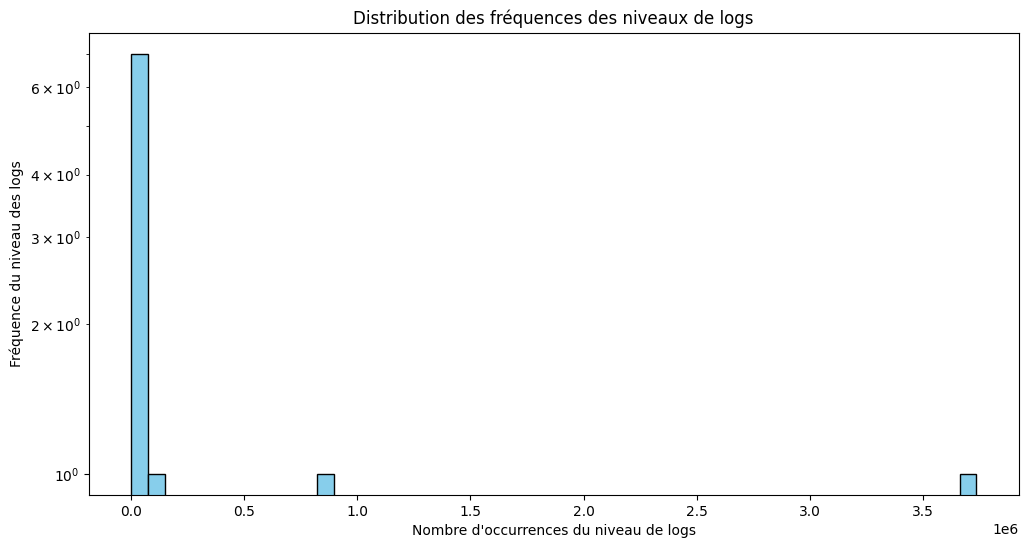

In [ ]:
# Un histogramme est plus adapté pour afficher la répartition des fréquences des timestamps lorsqu'il y a une grande diversité de valeurs
import matplotlib.pyplot as plt

# Compter les occurrences de chaque timestamp
timestamp_counts = logs_bgl['log_level'].value_counts()

# Création de l'histogramme
plt.figure(figsize=(12, 6))
plt.hist(timestamp_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Nombre d'occurrences du niveau de logs")
plt.ylabel("Fréquence du niveau des logs")
plt.title("Distribution des fréquences des niveaux de logs")
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la distribution
plt.show()

# **Encodage des caractéristiques catégorielles**

In [ ]:
# Scikit-learn a un encodeur OneHot adéquat que nous pourrions utiliser dans notre pipeline. Cependant,
# pour des raisons d'exploration, l'encodeur OneHot de Scikit-learn ne garde pas trace de la valeur

def one_hot_encoder(df, column_name, exclude_col = False):
    merged_df = df.merge(pd.get_dummies(df[column_name], drop_first=False, prefix=column_name), left_index=True, right_index=True)
    if exclude_col:
        del merged_df[column_name] # Exclure la colonne d'origine
    return merged_df


## **Exploration de nos colonne et choix des variable a encoder**

In [ ]:
# Avant d'apliquer l'encodage OneHot
logs_bgl.columns

Index(['Timestamp', 'Date', 'System_ID', 'Detailed_Datetime', 'Additional_ID',
       'Message_Type', 'indentifier', 'log_level', 'Message'],
      dtype='object')

In [ ]:
# Comme le changement va être plus signifiant. On va copier le dataframe et sauvegarder dans une autre variable (on peut toujours comparer le deux)
logs_bgl_ready = logs_bgl.copy()
category_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_cat']

In [ ]:
!pip install category-encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.6 MB/s eta 0:00:00


# **Encodage de Date Detailed_Datetime et log_level pour eviter la surconsommation de la memoire**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
logs_bgl_copy = logs_bgl.copy()
# Chargement de votre DataFrame
# Supposons que `blg_logs_copy` est votre DataFrame
logs_bgl_copy['Date'] = pd.to_datetime(logs_bgl_copy['Date'], errors='coerce')
logs_bgl_copy['Detailed_Datetime'] = pd.to_datetime(logs_bgl_copy['Detailed_Datetime'], errors='coerce')

# 1. Extraction des caractéristiques temporelles pour `Date` et `Detailed_Datetime`
def extract_date_features(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['hour'] = df['Detailed_Datetime'].dt.hour
    df['minute'] = df['Detailed_Datetime'].dt.minute
    return df.drop(['Date', 'Detailed_Datetime'], axis=1)

# 2. Pipeline pour encoder uniquement `log_level`
preprocessor = ColumnTransformer(
    transformers=[
        ('date_features', FunctionTransformer(extract_date_features), ['Date', 'Detailed_Datetime']),
        ('log_level', OrdinalEncoder(), ['log_level'])  # Encoder ordinal pour `log_level`
    ],
    remainder='passthrough'
)

# Appliquer le préprocessing
processed_data = preprocessor.fit_transform(logs_bgl_copy)

# Conversion en DataFrame pour voir le résultat
processed_df = pd.DataFrame(processed_data, columns=['year', 'month', 'day', 'hour', 'minute', 'log_level_encoded'] + logs_bgl_copy.columns.difference(['Date', 'Detailed_Datetime', 'log_level']).tolist())
print(processed_df)


         year month day hour minute log_level_encoded Additional_ID  \
0        2005     6   3   15     42               4.0    1117838570   
1        2005     6   3   15     42               4.0    1117838570   
2        2005     6   3   15     42               4.0    1117838570   
3        2005     6   3   15     42               4.0    1117838570   
4        2005     6   3   15     42               4.0    1117838570   
...       ...   ...  ..  ...    ...               ...           ...   
4747958  2006     1   4    8      0               3.0    1136390405   
4747959  2006     1   4    8      0               3.0    1136390405   
4747960  2006     1   4    8      0               3.0    1136390405   
4747961  2006     1   4    8      0               3.0    1136390405   
4747962  2006     1   4    8      0               3.0    1136390405   

                     Message         Message_Type System_ID Timestamp  \
0        R02-M1-N0-C:J12-U11  R02-M1-N0-C:J12-U11       RAS    KERNEL   
1

# **Encodage de Date System_Id et log_level pour eviter la surconsommation de la memoire**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from category_encoders import BinaryEncoder
logs_bgl_ready = logs_bgl
# Chargement de votre DataFrame
# Supposons que `blg_logs` est votre DataFrame
logs_bgl_ready['Date'] = pd.to_datetime(logs_bgl_ready['Date'], errors='coerce')
logs_bgl_ready['Detailed_Datetime'] = pd.to_datetime(logs_bgl_ready['Detailed_Datetime'], errors='coerce')

# 1. Extraction des caractéristiques temporelles
def extract_date_features(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['hour'] = df['Detailed_Datetime'].dt.hour
    df['minute'] = df['Detailed_Datetime'].dt.minute
    return df.drop(['Date', 'Detailed_Datetime'], axis=1)

# 2. Pipeline pour encoder log_level et System_ID
preprocessor = ColumnTransformer(
    transformers=[
        ('date_features', FunctionTransformer(extract_date_features), ['Date', 'Detailed_Datetime']),
        ('log_level', OrdinalEncoder(), ['log_level']),
        ('system_id', BinaryEncoder(), ['System_ID'])  # Utiliser OneHotEncoder() ici si vous préférez
    ],
    remainder='passthrough'
)

# Appliquer le préprocessing
processed_data = preprocessor.fit_transform(logs_bgl_ready)

# Conversion en DataFrame pour voir le résultat
processed_df = pd.DataFrame(processed_data, columns=['year', 'month', 'day', 'hour', 'minute', 'log_level_encoded'] + preprocessor.named_transformers_['system_id'].get_feature_names_out().tolist() + logs_bgl_ready.columns.difference(['Date', 'Detailed_Datetime', 'log_level', 'System_ID']).tolist())
processed_df.head()


,year,month,day,hour,minute,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,...,System_ID_12,System_ID_13,System_ID_14,System_ID_15,System_ID_16,Additional_ID,Message,Message_Type,Timestamp,indentifier
0,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
1,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
2,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
3,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
4,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
# Combien de données avons-nous?
print(f'Nous avons {processed_df.shape[0]} lignes et {processed_df.shape[1]} colonnes.')

Nous avons 4747963 lignes et 28 colonnes.


In [ ]:
# Avons-nous des données manquantes?

missing_values = processed_df.isnull().sum()
processed_df.head()

,year,month,day,hour,minute,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,...,System_ID_12,System_ID_13,System_ID_14,System_ID_15,System_ID_16,Additional_ID,Message,Message_Type,Timestamp,indentifier
0,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
1,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
2,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
3,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected
4,2005,6,3,15,42,4.0,0,0,0,0,...,0,0,0,0,1,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,instruction cache parity error corrected


In [ ]:
# Quels sont les types de caractéristiques (numériques vs catégorielles) ?

print(processed_df.dtypes)

year                 object
month                object
day                  object
hour                 object
minute               object
log_level_encoded    object
System_ID_0          object
System_ID_1          object
System_ID_2          object
System_ID_3          object
System_ID_4          object
System_ID_5          object
System_ID_6          object
System_ID_7          object
System_ID_8          object
System_ID_9          object
System_ID_10         object
System_ID_11         object
System_ID_12         object
System_ID_13         object
System_ID_14         object
System_ID_15         object
System_ID_16         object
Additional_ID        object
Message              object
Message_Type         object
Timestamp            object
indentifier          object
dtype: object


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 28 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   year               object
 1   month              object
 2   day                object
 3   hour               object
 4   minute             object
 5   log_level_encoded  object
 6   System_ID_0        object
 7   System_ID_1        object
 8   System_ID_2        object
 9   System_ID_3        object
 10  System_ID_4        object
 11  System_ID_5        object
 12  System_ID_6        object
 13  System_ID_7        object
 14  System_ID_8        object
 15  System_ID_9        object
 16  System_ID_10       object
 17  System_ID_11       object
 18  System_ID_12       object
 19  System_ID_13       object
 20  System_ID_14       object
 21  System_ID_15       object
 22  System_ID_16       object
 23  Additional_ID      object
 24  Message            object
 25  Message_Type       object
 26  Timestamp     

In [ ]:
processed_df.describe()

,year,month,day,hour,minute,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,...,System_ID_12,System_ID_13,System_ID_14,System_ID_15,System_ID_16,Additional_ID,Message,Message_Type,Timestamp,indentifier
count,4747963,4747963,4747963,4747963,4747963,4747963.0,4747963,4747963,4747963,4747963,...,4747963,4747963,4747963,4747963,4747963,4747963,4658667,4643748,4747963,4713493
unique,2,8,31,24,60,10.0,2,2,2,2,...,2,2,2,2,2,299849,69257,6,14,358356
top,2005,7,9,11,9,4.0,0,0,0,0,...,0,0,0,1,0,1123030909,R30-M0-N9-C:J16-U01,RAS,KERNEL,data TLB error interrupt
freq,4744994,1667866,490197,388648,104999,3735813.0,4361871,3874413,3495343,2890398,...,2405104,2514163,2401062,2378063,2481150,393,152329,4643432,4324651,152734


In [ ]:
print(processed_df['System_ID_1'].value_counts())

System_ID_1
0    3874413
1     873550
Name: count, dtype: int64


In [ ]:
print(processed_df.columns)

Index(['year', 'month', 'day', 'hour', 'minute', 'log_level_encoded',
       'System_ID_0', 'System_ID_1', 'System_ID_2', 'System_ID_3',
       'System_ID_4', 'System_ID_5', 'System_ID_6', 'System_ID_7',
       'System_ID_8', 'System_ID_9', 'System_ID_10', 'System_ID_11',
       'System_ID_12', 'System_ID_13', 'System_ID_14', 'System_ID_15',
       'System_ID_16', 'Additional_ID', 'Message', 'Message_Type', 'Timestamp',
       'indentifier'],
      dtype='object')


# **Creation de la matrice**

In [ ]:
# Filtrer les colonnes numériques spécifiques
categorical_numeric_columns = processed_df[
    ['log_level_encoded'] + [col for col in processed_df.columns if col.startswith('System_ID_')]
]

# Afficher les 5 premières lignes pour vérifier le résultat
categorical_numeric_columns.head()


,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,System_ID_4,System_ID_5,System_ID_6,System_ID_7,System_ID_8,System_ID_9,System_ID_10,System_ID_11,System_ID_12,System_ID_13,System_ID_14,System_ID_15,System_ID_16
0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **Concatenation des date avec notre tableau**

In [ ]:
# Supposons que `encoded_df` est votre tableau encodé actuel
# Et que `processed_df` est votre DataFrame d'origine avec les colonnes de date et heure

# Extraire les colonnes temporelles
logs_bgl_ready['year'] = logs_bgl_ready['Date'].dt.year
logs_bgl_ready['month'] = logs_bgl_ready['Date'].dt.month
logs_bgl_ready['day'] = logs_bgl_ready['Date'].dt.day
logs_bgl_ready['hour'] = logs_bgl_ready['Detailed_Datetime'].dt.hour
logs_bgl_ready['minute'] = logs_bgl_ready['Detailed_Datetime'].dt.minute

# Sélectionner uniquement les colonnes souhaitées
temporal_columns = logs_bgl_ready[['year', 'month', 'day', 'hour', 'minute']]

# Ajouter les colonnes temporelles au DataFrame encodé
categorical_numeric_columns = pd.concat([categorical_numeric_columns, temporal_columns], axis=1)

# Afficher le DataFrame final
categorical_numeric_columns.head()

,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,System_ID_4,System_ID_5,System_ID_6,System_ID_7,System_ID_8,...,System_ID_12,System_ID_13,System_ID_14,System_ID_15,System_ID_16,year,month,day,hour,minute
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2005,6,3,15,42
1,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2005,6,3,15,42
2,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2005,6,3,15,42
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2005,6,3,15,42
4,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2005,6,3,15,42


**1. Anomalies dans les niveaux de journalisation (log_level_encoded)**

In [ ]:
# Identifier les anomalies de niveau élevé
anomalies_log_level = categorical_numeric_columns[categorical_numeric_columns['log_level_encoded'] <= 2]  # Ex : 2 pourrait représenter ERROR


**2. Détection d'anomalies temporelles (year, month, day, hour, minute)**

In [ ]:
# Identifier les anomalies en dehors des heures ouvrées (par exemple, entre 0h et 6h)
anomalies_out_of_hours = categorical_numeric_columns[(categorical_numeric_columns['hour'] < 6) & (categorical_numeric_columns['log_level_encoded'] <= 2)]


**3. Analyse des systèmes (System_ID)**

In [ ]:
# Supposons que System_ID_0 représente un système critique.
anomalies_system_specific = categorical_numeric_columns[(categorical_numeric_columns['System_ID_0'] == 1) & (categorical_numeric_columns['log_level_encoded'] <= 2)]

**4. Détection de modèles rares (Rare Event Detection)**

In [ ]:
pip install -U scikit-learn

In [ ]:
from sklearn.ensemble import IsolationForest

# Choisir les colonnes numériques pour Isolation Forest
features = categorical_numeric_columns[['log_level_encoded', 'year', 'month', 'day', 'hour', 'minute'] + [f'System_ID_{i}' for i in range(17)]]

# Ajuster le modèle
isolation_forest = IsolationForest(contamination=0.01)  # 1% des données comme anomalies
categorical_numeric_columns['anomaly'] = isolation_forest


AttributeError: 'IsolationForest' object has no attribute 'estimators_'

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

data = categorical_numeric_columns.select_dtypes(include=['number'])

# Initialisation et entraînement de l'Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
categorical_numeric_columns['anomaly'] = model.fit_predict(data)

# Les prédictions -1 indiquent des anomalies, 1 sont des points normaux
anomalies = categorical_numeric_columns[categorical_numeric_columns['anomaly'] == -1]

print("Nombre d'anomalies détectées :", len(anomalies))
anomalies.head()


Nombre d'anomalies détectées : 47394


,log_level_encoded,System_ID_0,System_ID_1,System_ID_2,System_ID_3,System_ID_4,System_ID_5,System_ID_6,System_ID_7,System_ID_8,...,System_ID_13,System_ID_14,System_ID_15,System_ID_16,year,month,day,hour,minute,anomaly
29757,4.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2005,6,5,0,59,-1
1090966,4.0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2005,6,27,0,59,-1
1090967,4.0,0,0,1,1,1,0,1,0,1,...,0,1,0,1,2005,6,27,0,59,-1
1090968,4.0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,2005,6,27,0,59,-1
1090969,4.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,2005,6,27,0,59,-1


In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Supposons que `categorical_numeric_columns` est votre tableau encodé, prêt à être utilisé pour la détection d'anomalies

# Préparation des données - Suppression de toutes les colonnes non numériques si nécessaire
data = categorical_numeric_columns.select_dtypes(include=['number'])

# Initialisation de l'Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(data)

# Prédiction des anomalies
# Le modèle retourne -1 pour les anomalies et 1 pour les points normaux
categorical_numeric_columns['anomaly'] = model.predict(data)

# Filtrer les anomalies détectées
anomalies = categorical_numeric_columns[categorical_numeric_columns['anomaly'] == -1]

print("Nombre d'anomalies détectées :", len(anomalies))
print(anomalies.head())


# **Partie 4. Prédiction d'anormalie (Modelling)**
Tout d'abord, nous allons diviser le jeu de données en:

Caractéristiques (X) et variable cible (y)
Ensemble d'entraînement (75%) et ensemble de test (25%)

In [ ]:
# Importation des bibliothèques que nous utiliserons dans cette partie de la classe
from sklearn.model_selection import train_test_split, KFold, cross_val_score # pour séparer les données
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score #Pour évaluer notre modèle
from sklearn.model_selection import GridSearchCV

# Modèles d'algorithmes à comparer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# TODO: Ajouter ici tout nouveau modèle que vous souhaitez essayer (ANN, etc.)
dataset_ready =categorical_numeric_columns
# Création des variables X et y
dataset_ready_x = dataset_ready.drop(['Risk_bad', 'Risk_good', 'Age', 'Sex_male'], axis='columns')
X = dataset_ready_x.values
feature_names = dataset_ready_x.columns

y = dataset_ready['log_level_encoded'].values

# Séparation de X et y en version d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Chargement de votre DataFrame
# Supposons que `logs_bgl` est votre DataFrame

# Convertir les colonnes 'Date' et 'Detailed_Datetime' en datetime
logs_bgl['Date'] = pd.to_datetime(logs_bgl['Date'], errors='coerce')
logs_bgl['Detailed_Datetime'] = pd.to_datetime(logs_bgl['Detailed_Datetime'], errors='coerce')

# 1. Préparer les features temporelles pour `Date` et `Detailed_Datetime`
def extract_date_features(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['hour'] = df['Detailed_Datetime'].dt.hour
    df['minute'] = df['Detailed_Datetime'].dt.minute
    return df.drop(['Date', 'Detailed_Datetime'], axis=1)

# 2. Pipeline pour transformer les catégories
preprocessor = ColumnTransformer(
    transformers=[
        ('date_features', FunctionTransformer(extract_date_features), ['Date', 'Detailed_Datetime']),
        ('system_id', OneHotEncoder(sparse=False), ['System_ID']),  # Forcer sparse=False pour sortie dense
        ('additional_id', OneHotEncoder(sparse=False), ['Additional_ID']),  # Forcer sparse=False
        ('message_type', OneHotEncoder(sparse=False), ['Message_Type']),  # Forcer sparse=False
        ('identifier', BinaryEncoder(), ['indentifier']),
        ('log_level', OrdinalEncoder(), ['log_level'])  # OrdinalEncoder pour les niveaux de journalisation
    ],
    remainder='passthrough'
)

# Appliquer le préprocessing
processed_data = preprocessor.fit_transform(logs_bgl)

# Affichage de la matrice transformée (dense)
print(processed_data)


NameError: name 'blg_logs' is not defined

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np

# Supposons que `logs_bgl` est le DataFrame contenant les données de logs
# Encodage des niveaux de log
log_level_mapping = {
    'INFO': 1,
    'WARNING': 2,
    'ERROR': 3,
    'SEVERE': 4,
    'FAILURE': 5,
    'FATAL': 6,
    'Kill': 7,
    'single': 8,
    'microseconds': 9,
    '0x00544eb8,': 10
}
logs_bgl['log_level_encoded'] = logs_bgl['log_level'].map(log_level_mapping)

# Suppression des logs sans correspondance (NaN)
logs_bgl.dropna(subset=['log_level_encoded'], inplace=True)

# Conversion de `Timestamp` ou `Detailed_Datetime` en format datetime si nécessaire
logs_bgl['Detailed_Datetime'] = pd.to_datetime(logs_bgl['Detailed_Datetime'])

# Regroupement par heure (ou autre intervalle de temps pertinent)
grouped_logs = logs_bgl.resample('H', on='Detailed_Datetime').log_level_encoded.mean().fillna(0)
print(grouped_logs)
# # Préparation des données pour l'algorithme de détection d'anomalies
# X = grouped_logs.values.reshape(-1, 1)

# # Application de l'IsolationForest
# model = IsolationForest(contamination=0.01, random_state=42)
# model.fit(X)
# grouped_logs['anomaly'] = model.predict(X)

# # Extraction des anomalies
# anomalies = grouped_logs[grouped_logs['anomaly'] == -1]
# print("Anomalies détectées:\n", anomalies)


<ipython-input-15-a8e0d9ec5c6a>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_logs = blg_logs.resample('H', on='Detailed_Datetime').log_level_encoded.mean().fillna(0)


Detailed_Datetime
2005-06-03 15:00:00    1.000000
2005-06-03 16:00:00    1.036955
2005-06-03 17:00:00    1.000000
2005-06-03 18:00:00    1.000000
2005-06-03 19:00:00    1.000000
                         ...   
2006-01-04 04:00:00    1.000000
2006-01-04 05:00:00    0.000000
2006-01-04 06:00:00    0.000000
2006-01-04 07:00:00    1.000000
2006-01-04 08:00:00    6.000000
Freq: h, Name: log_level_encoded, Length: 5154, dtype: float64


In [ ]:
# Quelle est la distribution de la variable `Message`?
# Quels sont les types de caractéristiques (numériques vs catégorielles) ?
print(logs_bgl['Message'].value_counts())

Message
data TLB error interrupt                                                                                                                                                       152734
0 microseconds spent in the rbs signal handler during 0 calls. 0 microseconds was the maximum time for a single instance of a correctable ddr.                                 135005
instruction cache parity error corrected                                                                                                                                       105924
idoproxydb hit ASSERT condition: ASSERT expression=0 Source file=idotransportmgr.cpp Source line=1043 Function=int IdoTransportMgr::SendPacket(IdoUdpMgr*, BglCtlPavTrace*)     84168
1146800 double-hummer alignment exceptions                                                                                                                                      74091
                                                                                  

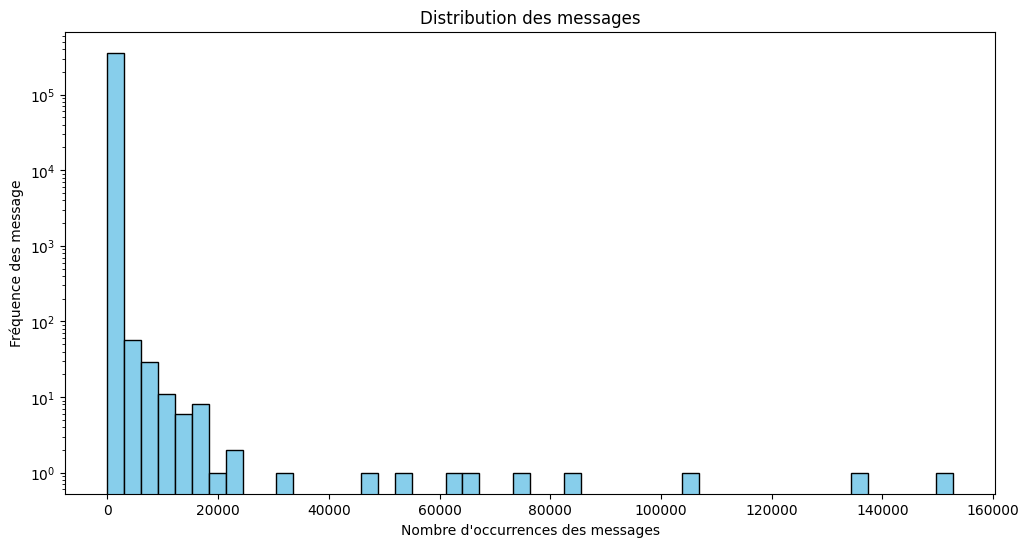

In [ ]:
# Un histogramme est plus adapté pour afficher la répartition des fréquences des message lorsqu'il y a une grande diversité de valeurs
import matplotlib.pyplot as plt

# Compter les occurrences de chaque timestamp
Message_counts = blg_logs['Message'].value_counts()

# Création de l'histogramme
plt.figure(figsize=(12, 6))
plt.hist(Message_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Nombre d'occurrences des messages")
plt.ylabel("Fréquence des message")
plt.title("Distribution des messages")
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la distribution
plt.show()